# Bioinfo Projekt Gruppe 4-4: k-means 
*Members: Benedict, Julia, Thorge and Marilena*
## Tasks

Implement the following algorithms in python using the numpy library:

1. implement k-means:

1. compare your implementation with the sklearn implementation with respect to quality and speed
  implement mini-batch k-means:

1. compare your implementation with the sklearn implementation with respect to quality and speed
  implement k-means++ initialization:

1. Compare the runtime and quality of your k-means implementation and your mini batch k-means implementation for  different datasets. You can use code from sklearn to generate datasets of arbitrary size and difficulty  (https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py). You should generate multiple plots to visualize the comparison (eg. you can plot the runtinme / cluster quality for different dataset sizes / number of clusters)

1. Cluster the 3K PBMCs from a Healthy Donor Dataset from 10x Genomics
1. use scanpy to load the data ( see https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)
1. compare the performance of your implementations with the sklearn implementations

#### Daten laden

In [2]:
import matplotlib.pyplot as plt
import urllib.request as url
import numpy as np
import scanpy as sc
import pandas as pd
import tarfile
import csv

#### Lädt Dateien von der Seite und entpackt sie:

In [3]:
site = "http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz"
data = url.urlretrieve(site, filename= None)[0]

tar = tarfile.open(data)
tar.extractall()



#### Liest matrix.mtx aus und konvertiert sie zu Numpy Matrix. Die Dateien gene.tsv und barcodes.tsv werden in Listen konvertiert.

In [4]:
adata = sc.read_10x_mtx('./filtered_gene_bc_matrices/hg19/',var_names='gene_symbols',cache=True) #komische Matrix

adata.var_names_make_unique()
pbmc = adata._X.todense() #Matrix

In [5]:
rows = []
columns = []
    
with open('./filtered_gene_bc_matrices/hg19/genes.tsv') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        columns.append(row[1])
with open('./filtered_gene_bc_matrices/hg19/barcodes.tsv') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        rows.append(row[0])     




## Visualisierung
#### Erstellt ein Diagramm wie auf der Seite gezeigt: https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

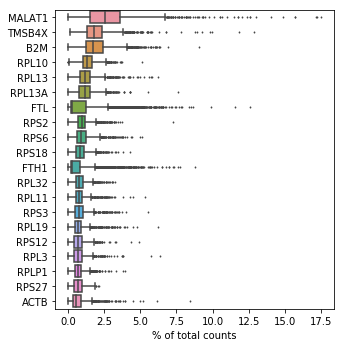

In [5]:
adata.var_names_make_unique()
sc.pl.highest_expr_genes(adata, n_top=20)

#### Quick Overview over Dataset:

In [6]:
ar_pbmc = pbmc.getA() #array
df_pbmc =pd.DataFrame(ar_pbmc, index = rows, columns = columns) #DataFrame

df_pbmc.describe()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2,AL590523.1,CT476828.1,PNRC2,SRSF10,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
count,2700.0,2700.0,2700.0,2700.0,2700.0,2700.000000,2700.0,2700.0,2700.000000,2700.0,...,2700.0,2700.0,2700.0,2700.000000,2700.000000,2700.0,2700.0,2700.0,2700.0,2700.0
mean,0.0,0.0,0.0,0.0,0.0,0.003333,0.0,0.0,0.001111,0.0,...,0.0,0.0,0.0,0.042963,0.025926,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.057649,0.0,0.0,0.033321,0.0,...,0.0,0.0,0.0,0.213491,0.161258,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,2.000000,2.000000,0.0,0.0,0.0,0.0,0.0


In [148]:
df_pbmc.loc[rows[50:60], columns[50:60]]

,TTLL10,TNFRSF18,TNFRSF4,SDF4,B3GALT6,FAM132A,RP5-902P8.12,UBE2J2,RP5-902P8.10,SCNN1D
AACACGTGGCTACA-1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
AACACGTGTACGAC-1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAGCACAAGAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACATTGATGGGAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCAGTGATACCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AACCCAGATCGCTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCGATGCTCCCA-1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCGATGGTCATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCGATGTTCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACCGCCTAGCGTT-1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


#### Dieser eine Befehl hätte viel Arbeit sparen können.....
Siehe hier (https://anndata.readthedocs.io/en/latest/anndata.AnnData.html#anndata.AnnData) was alles mit *adata* möglich ist

In [155]:
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
0,,,,,,,,,,,,,,,,,,,,,
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCACTGGTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGACCAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGGTTCTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCTGTAGCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 ...]

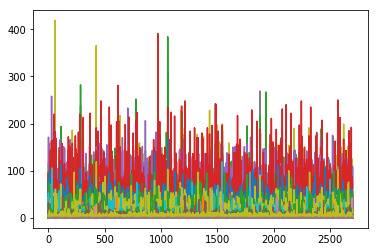

In [204]:
plt.plot(ar_pbmc)

In [18]:
import random
random.randint(1,len(rows))


52

Julia war hier